<a href="https://colab.research.google.com/github/JFrankVC/tog/blob/main/data_treatment/modis_data_treatment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project PAD setting for Colab IDE

In [1]:
# Mount the Google Drive
# Allow access - check steps and methods in: https://neptune.ai/blog/google-colab-dealing-with-files
from google.colab import drive
drive.mount('/content/drive', force_remount=True)  # if Colab root directory is shown, go to /content folder

Mounted at /content/drive


In [2]:
# How to install permanently non-preinstalled libraries
!pip install rioxarray && touch /root/.ipython/profile_default/startup/00-first.py && echo "import rioxarray" >> /root/.ipython/profile_default/startup/00-first.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.7/53.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 48.4 MB/s eta 0:00:00


In [3]:
# How to install permanently non-preinstalled libraries
!pip install earthpy && touch /root/.ipython/profile_default/startup/00-first.py && echo "import earthpy" >> /root/.ipython/profile_default/startup/00-first.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 14.6 MB/s eta 0:00:00


In [39]:
!pip install pyhdf && touch /root/.ipython/profile_default/startup/00-first.py && echo "import pyhdf" >> /root/.ipython/profile_default/startup/00-first.py

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 771.4/771.4 kB 10.9 MB/s eta 0:00:00


In [40]:
# Import packages
import os
import warnings

import matplotlib.pyplot as plt
import numpy.ma as ma
import xarray as xr
import rioxarray as rxr
from shapely.geometry import mapping, box
import geopandas as gpd
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
import pandas as pd
import pyhdf

from osgeo import gdal
xr.set_options(display_style='html')

In [160]:
# Check current working directory corresponds to Google Drive
retval = os.getcwd()
print(f"Current working directory {retval}")

# Change the directory - Google Drive -> folder from project "MODIS_Mexico_ThirdOrderPP"
path = "/content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/MODIS_Mexico_ThirdOrderPP/Mass_Concentration/"
os.chdir(path)

# Check current working directory corresponds to Google Drive
retval = os.getcwd()
print(f"Current working directory {retval}")

Current working directory /content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/MODIS_Mexico_ThirdOrderPP/Mass_Concentration
Current working directory /content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/MODIS_Mexico_ThirdOrderPP/Mass_Concentration


In [161]:
# Set path to Dataset folder
folder_path = "/content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/MODIS_Mexico_ThirdOrderPP/Mass_Concentration/"

In [162]:
# List all datatsets (HDF) in current folder
!ls

A2023001.hdf
MOD04_L2.A2023001.mosaic.061.2023124001710.psmcgscs_000501964210.Mass_Concentration_Land.hdf
MOD04_L2.A2023002.mosaic.061.2023124001738.psmcgscs_000501964210.Mass_Concentration_Land.hdf
MOD04_L2.A2023003.mosaic.061.2023124001921.psmcgscs_000501964210.Mass_Concentration_Land.hdf
MOD04_L2.A2023004.mosaic.061.2023124001706.psmcgscs_000501964210.Mass_Concentration_Land.hdf
MOD04_L2.A2023005.mosaic.061.2023124002133.psmcgscs_000501964210.Mass_Concentration_Land.hdf
MOD04_L2.A2023006.mosaic.061.2023124001757.psmcgscs_000501964210.Mass_Concentration_Land.hdf
MOD04_L2.A2023007.mosaic.061.2023124001917.psmcgscs_000501964210.Mass_Concentration_Land.hdf
MOD04_L2.A2023008.mosaic.061.2023124001915.psmcgscs_000501964210.Mass_Concentration_Land.hdf
MOD04_L2.A2023009.mosaic.061.2023124002055.psmcgscs_000501964210.Mass_Concentration_Land.hdf
MOD04_L2.A2023010.mosaic.061.2023124002035.psmcgscs_000501964210.Mass_Concentration_Land.hdf
MOD04_L2.A2023011.mosaic.061.2023124002011.psmcgscs_00050

## 1 Visualizacion dataset número 1 (día 1ro de enero de 2023)

In [174]:
# Import package pyhdf as issues with rioxarray library while reading HDF files (method used in local code)
from pyhdf.SD import SD, SDC
import numpy as np

Read Access to file: True

File Info: (1, 11)

File Datasets: {'Mass_Concentration_Land': (('YDim:mod04', 'XDim:mod04'), (222, 421), 5, 0)}

DS Attributes:
{'valid_range': [0.0, 1000.0], '_FillValue': -999.0, 'long_name': 'Estimated Column Mass(per area) using assumed mass extinction efficiency', 'units': '1.0e-6g/cm^2', 'scale_factor': 1.0, 'add_offset': 0.0, 'Parameter_Type': 'Output', 'Cell_Along_Swath_Sampling': [1, 2021, 10], 'Cell_Across_Swath_Sampling': [1, 1354, 10], 'Geolocation_Pointer': 'Internal geolocation arrays'}


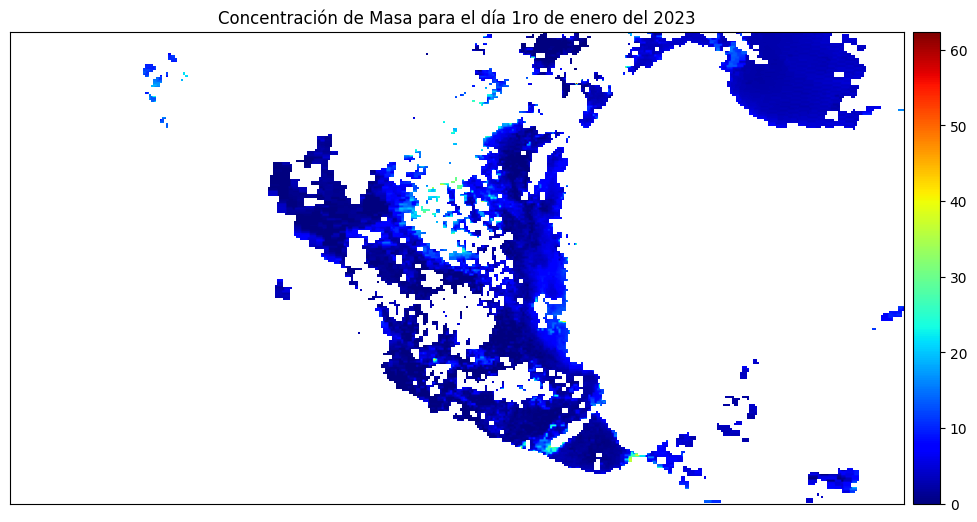

<Axes: title={'center': 'Concentración de Masa para el día 1ro de enero del 2023'}>

In [163]:
# Set file name and path
filename_001 = "MOD04_L2.A2023001.mosaic.061.2023124001710.psmcgscs_000501964210.Mass_Concentration_Land.hdf"
path_dataset_001 = os.path.join(folder_path, filename_001)

# Check access to HDF file is OK
print(f"Read Access to file: {os.access(path_dataset_001, os.R_OK)}\n")

# Read file
file = SD(filename_001, SDC.READ,)

print(f"File Info: {file.info()}\n")
print(f"File Datasets: {file.datasets()}\n")

# Extract Mass Concentration Land into a pyHDF Dataset
DATAFIELD_NAME='Mass_Concentration_Land'
ds_001 = file.select(DATAFIELD_NAME)

# Show attributes
print(f"DS Attributes:\n{ds_001.attributes()}")

# Get array values (pixels)
arr_001 = ds_001[:, :]

# Use _FillValue (-999.0) and set it to NaN for better visualization
arr_001[arr_001 == -999.0] = 'NaN'

# Plot band one of the data
COLOR_SET = 'jet'
ep.plot_bands(arr_001, cmap=COLOR_SET, title="Concentración de Masa para el día 1ro de enero del 2023")

## 2 Visualizacion dataset número 10 (día 10 de enero de 2023)

Read Access to file: True

File Info: (1, 11)

File Datasets: {'Mass_Concentration_Land': (('YDim:mod04', 'XDim:mod04'), (222, 421), 5, 0)}

DS Attributes:
{'valid_range': [0.0, 1000.0], '_FillValue': -999.0, 'long_name': 'Estimated Column Mass(per area) using assumed mass extinction efficiency', 'units': '1.0e-6g/cm^2', 'scale_factor': 1.0, 'add_offset': 0.0, 'Parameter_Type': 'Output', 'Cell_Along_Swath_Sampling': [1, 2021, 10], 'Cell_Across_Swath_Sampling': [1, 1354, 10], 'Geolocation_Pointer': 'Internal geolocation arrays'}


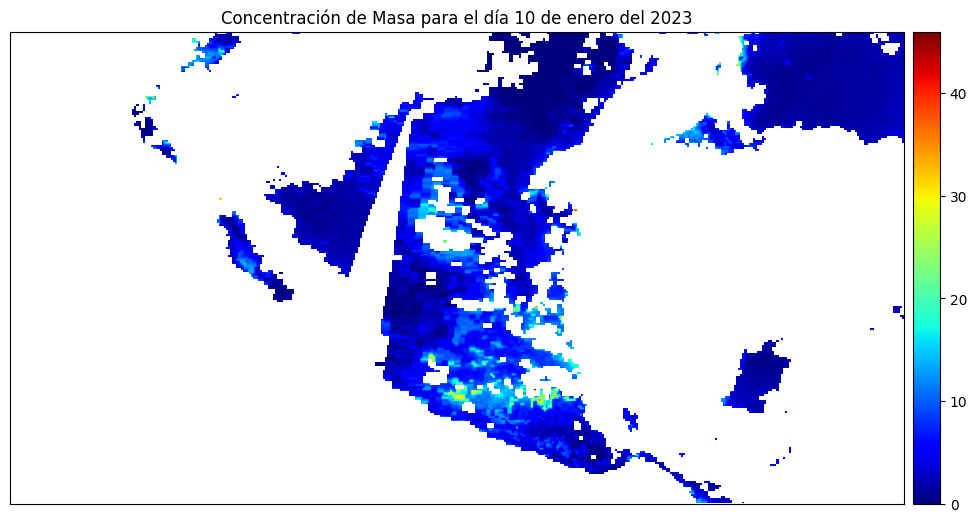

<Axes: title={'center': 'Concentración de Masa para el día 10 de enero del 2023'}>

In [164]:
# Set file name and path
filename_010 = "MOD04_L2.A2023010.mosaic.061.2023124002035.psmcgscs_000501964210.Mass_Concentration_Land.hdf"
path_dataset_010 = os.path.join(folder_path, filename_010)

# Check access to HDF file is OK
print(f"Read Access to file: {os.access(path_dataset_010, os.R_OK)}\n")

# Read file
file = SD(filename_010, SDC.READ,)

print(f"File Info: {file.info()}\n")
print(f"File Datasets: {file.datasets()}\n")

# Extract Mass Concentration Land into a pyHDF Dataset
DATAFIELD_NAME='Mass_Concentration_Land'
ds_010 = file.select(DATAFIELD_NAME)

# Show attributes
print(f"DS Attributes:\n{ds_010.attributes()}")

# Get array values (pixels)
arr_010 = ds_010[:, :]

# Use _FillValue (-999.0) and set it to NaN for better visualization
arr_010[arr_010 == -999.0] = 'NaN'

# Plot band one of the data
COLOR_SET = 'jet'
ep.plot_bands(arr_010, cmap=COLOR_SET, title="Concentración de Masa para el día 10 de enero del 2023")

## 3 Visualizacion dataset número 20 (día 20 de enero de 2023)

Read Access to file: True

File Info: (1, 11)

File Datasets: {'Mass_Concentration_Land': (('YDim:mod04', 'XDim:mod04'), (222, 421), 5, 0)}

DS Attributes:
{'valid_range': [0.0, 1000.0], '_FillValue': -999.0, 'long_name': 'Estimated Column Mass(per area) using assumed mass extinction efficiency', 'units': '1.0e-6g/cm^2', 'scale_factor': 1.0, 'add_offset': 0.0, 'Parameter_Type': 'Output', 'Cell_Along_Swath_Sampling': [1, 2021, 10], 'Cell_Across_Swath_Sampling': [1, 1354, 10], 'Geolocation_Pointer': 'Internal geolocation arrays'}


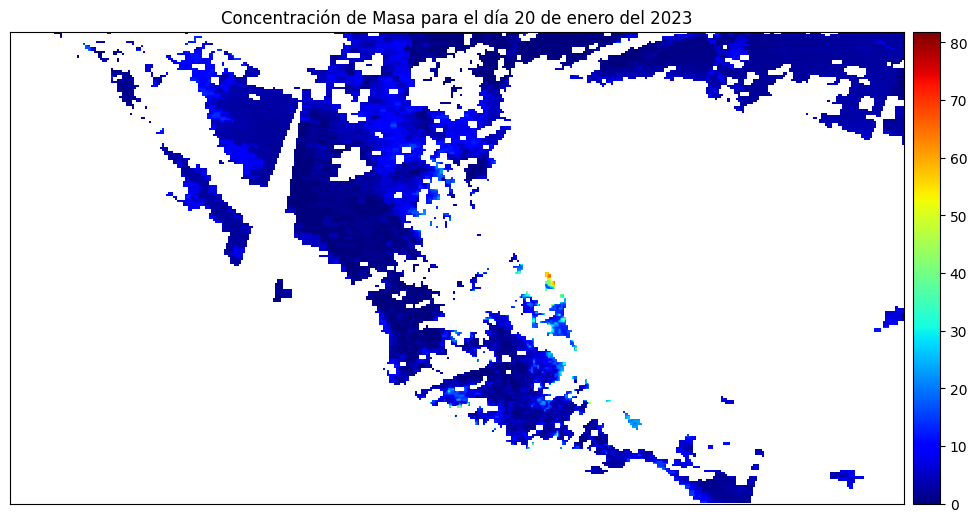

<Axes: title={'center': 'Concentración de Masa para el día 20 de enero del 2023'}>

In [165]:
# Set file name and path
filename_020 = "MOD04_L2.A2023020.mosaic.061.2023124001905.psmcgscs_000501964210.Mass_Concentration_Land.hdf"
path_dataset_020 = os.path.join(folder_path, filename_020)

# Check access to HDF file is OK
print(f"Read Access to file: {os.access(path_dataset_020, os.R_OK)}\n")

# Read file
file = SD(filename_020, SDC.READ,)

print(f"File Info: {file.info()}\n")
print(f"File Datasets: {file.datasets()}\n")

# Extract Mass Concentration Land into a pyHDF Dataset
DATAFIELD_NAME='Mass_Concentration_Land'
ds_020 = file.select(DATAFIELD_NAME)

# Show attributes
print(f"DS Attributes:\n{ds_020.attributes()}")

# Get array values (pixels)
arr_020 = ds_020[:, :]

# Use _FillValue (-999.0) and set it to NaN for better visualization
arr_020[arr_020 == -999.0] = 'NaN'

# Plot band one of the data
COLOR_SET = 'jet'
ep.plot_bands(arr_020, cmap=COLOR_SET, title="Concentración de Masa para el día 20 de enero del 2023")

## 4 Visualizacion del promediado de la concentración de masa (período del 1ro al 20 de enero de 2023)

In [167]:
# Read all datasets from folder

NUM_DATASETS = 120
parent_path = folder_path
files = os.listdir(parent_path)
print(f"Files in folder: {files}")

Files in folder: ['MOD04_L2.A2023001.mosaic.061.2023124001710.psmcgscs_000501964210.Mass_Concentration_Land.hdf', 'MOD04_L2.A2023002.mosaic.061.2023124001738.psmcgscs_000501964210.Mass_Concentration_Land.hdf', 'MOD04_L2.A2023003.mosaic.061.2023124001921.psmcgscs_000501964210.Mass_Concentration_Land.hdf', 'MOD04_L2.A2023004.mosaic.061.2023124001706.psmcgscs_000501964210.Mass_Concentration_Land.hdf', 'MOD04_L2.A2023005.mosaic.061.2023124002133.psmcgscs_000501964210.Mass_Concentration_Land.hdf', 'MOD04_L2.A2023006.mosaic.061.2023124001757.psmcgscs_000501964210.Mass_Concentration_Land.hdf', 'MOD04_L2.A2023007.mosaic.061.2023124001917.psmcgscs_000501964210.Mass_Concentration_Land.hdf', 'MOD04_L2.A2023008.mosaic.061.2023124001915.psmcgscs_000501964210.Mass_Concentration_Land.hdf', 'MOD04_L2.A2023009.mosaic.061.2023124002055.psmcgscs_000501964210.Mass_Concentration_Land.hdf', 'MOD04_L2.A2023010.mosaic.061.2023124002035.psmcgscs_000501964210.Mass_Concentration_Land.hdf', 'MOD04_L2.A2023011.mos

In [168]:
ds_twenty_days = []

for i in range(NUM_DATASETS):
    print(i)
    path = parent_path + files[i]
    print(f"File path i={i}: {path}")

    # Read file
    file = SD(path, SDC.READ,)

    print(f"File Info: {file.info()}\n")
    print(f"File Datasets: {file.datasets()}\n")

    # Extract Mass Concentration Land into a pyHDF Dataset
    DATAFIELD_NAME='Mass_Concentration_Land'
    ds_i = file.select(DATAFIELD_NAME)

    # Get array values (pixels)
    arr_i = ds_i[:, :]

    # Use _FillValue (-999.0) and set it to NaN for better visualization
    arr_i[arr_i == -999.0] = 'NaN'

    ds_twenty_days.append(arr_i)


0
File path i=0: /content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/MODIS_Mexico_ThirdOrderPP/Mass_Concentration/MOD04_L2.A2023001.mosaic.061.2023124001710.psmcgscs_000501964210.Mass_Concentration_Land.hdf
File Info: (1, 11)

File Datasets: {'Mass_Concentration_Land': (('YDim:mod04', 'XDim:mod04'), (222, 421), 5, 0)}

1
File path i=1: /content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/MODIS_Mexico_ThirdOrderPP/Mass_Concentration/MOD04_L2.A2023002.mosaic.061.2023124001738.psmcgscs_000501964210.Mass_Concentration_Land.hdf
File Info: (1, 11)

File Datasets: {'Mass_Concentration_Land': (('YDim:mod04', 'XDim:mod04'), (222, 421), 5, 0)}

2
File path i=2: /content/drive/MyDrive/Colab_Notebooks/Datasets/MODIS_Proyecto_PAD/MODIS_Mexico_ThirdOrderPP/Mass_Concentration/MOD04_L2.A2023003.mosaic.061.2023124001921.psmcgscs_000501964210.Mass_Concentration_Land.hdf
File Info: (1, 11)

File Datasets: {'Mass_Concentration_Land': (('YDim:mod04', 'XDim:mod04'), (222, 421), 

In [173]:
print(ds_twenty_days[0].shape)

(222, 421)


<ipython-input-177-251723b96ce9>:16: RuntimeWarning: Mean of empty slice
  pixel_mean = np.nanmean(pixel_vector)   # using method nanmean so NaN values are not considered


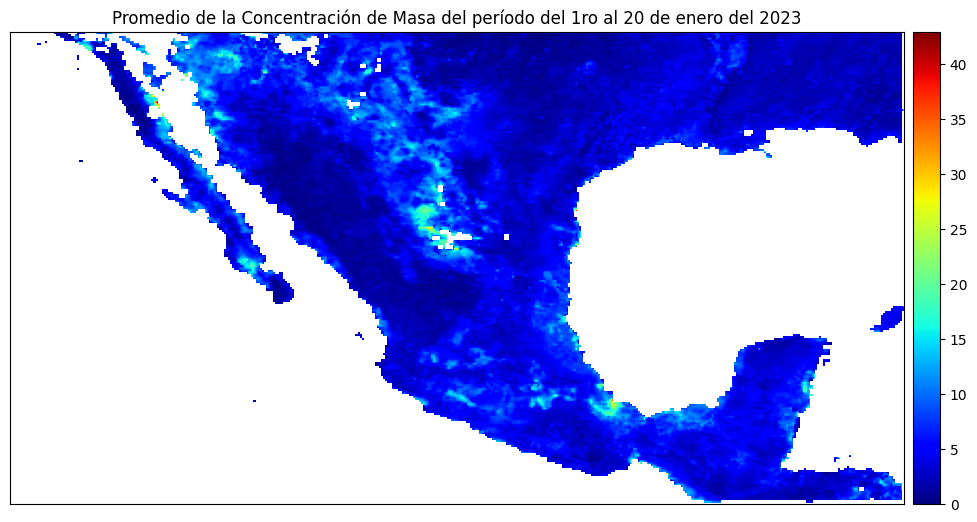

<Axes: title={'center': 'Promedio de la Concentración de Masa del período del 1ro al 20 de enero del 2023'}>

In [177]:
# Get a compy of dataset 1 to store de mean
ds_copy = ds_twenty_days[0]

# Boundaries for shape of arrays considering 0-based index
im_shape = ds_twenty_days[0].shape
shape_x = im_shape[0] - 1   # This is dimension Y in array as seen in Panoply
shape_y = im_shape[1] - 1   # This is dimension X in array as seen in Panoply

# Get mean value for each pixel not considering NaN values
for i in range(shape_x):
    for j in range(shape_y):
        pixel_vector = []
        for dataset_number in range(20):
            pixel_vector.append(ds_twenty_days[dataset_number][i][j])
            # print(f'Dataset Number: {dataset_number + 1}, X: {i}, Y: {j}')
        pixel_mean = np.nanmean(pixel_vector)   # using method nanmean so NaN values are not considered
        ds_copy[i][j] = pixel_mean

# Plot band one of the data
ep.plot_bands(ds_copy, cmap="jet", title="Promedio de la Concentración de Masa del período del 1ro al 20 de enero del 2023")